This notebook implements the KNN algorithm to predict a continuous value (in case of a regression).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Sample data

data = {'f1': [4, 1, 9, 7, 10, 12, 14, 8],
    'f2': [1, 2, 14, 5, 16, 18, 10, 10]}

df = pd.DataFrame(data)

<Axes: xlabel='f1', ylabel='f2'>

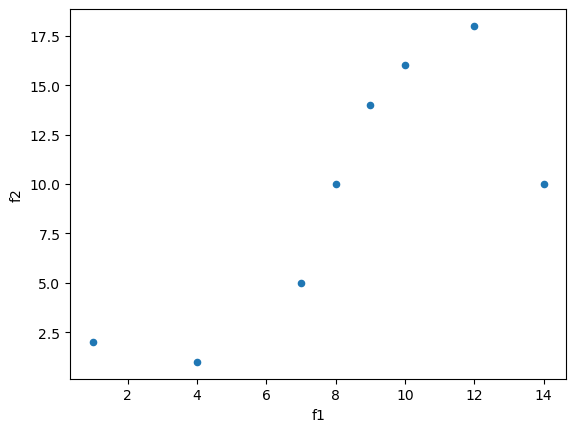

In [4]:
# Plot the sample data

df.plot.scatter(x="f1",y="f2")

In [42]:
class KNN:
    def __init__(self, k, training_data) -> None:
        self.k = k
        self.training_data = training_data

    def predict(self, point):
        distances = []
        for _, row in self.training_data.iterrows():
            # Used euclidean distance as a metric.
            distance = np.sqrt(
                (point[0] - row["f1"]) ** 2 + (point[1] - row["f2"]) ** 2
            )
            distances.append(distance)
        distances = np.array(distances)
        k_lower_indexes = distances.argsort()[: self.k]
        k_points = self.training_data.iloc[k_lower_indexes]
        return k_points.mean()

In [43]:
KNNClassifier = KNN(3, df)

In [44]:
# The predicted value

predicted = KNNClassifier.predict([11, 3])

In [51]:
pd.DataFrame(predicted).transpose()

,f1,f2
0,8.333333,5.333333


/var/folders/8j/_lzvndkd2712bcnvrfgbvxpm0000gn/T/ipykernel_11929/3804811130.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(predicted[0], predicted[1], color="red", label="Prediction")


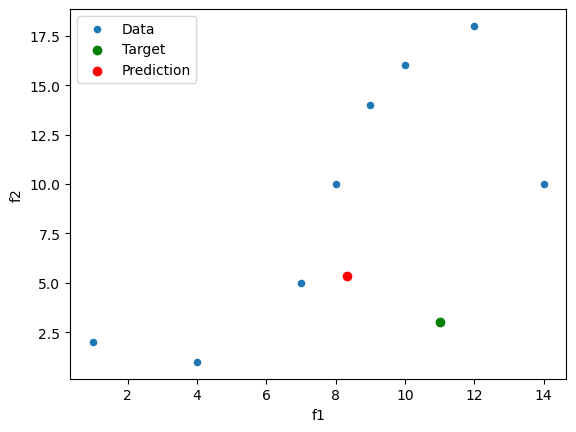

In [53]:
# Plot the Target and the predicted data points

df.plot.scatter(x="f1", y="f2", label="Data")
plt.scatter(11, 3, color="green", label="Target")
plt.scatter(predicted[0], predicted[1], color="red", label="Prediction")
plt.legend()
plt.show()